In [6]:
import sys
sys.path.append("../src")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/Creditcard_data.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df['Class'].value_counts()

Class
0    763
1      9
Name: count, dtype: int64

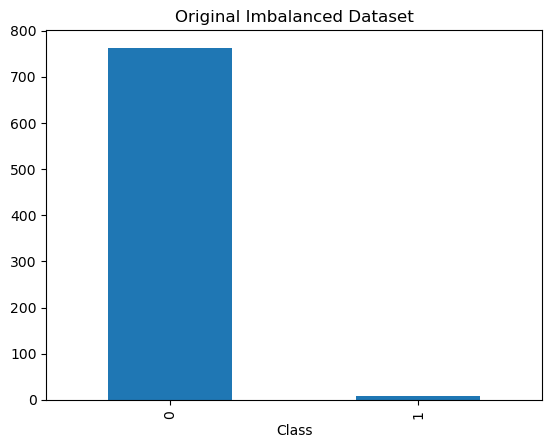

In [8]:
df['Class'].value_counts().plot(kind='bar')
plt.title("Original Imbalanced Dataset")
plt.show()

In [9]:
from imblearn.over_sampling import SMOTE

X = df.drop("Class", axis=1)
y = df["Class"]

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

balanced_df = pd.concat(
    [pd.DataFrame(X_bal, columns=X.columns),
     pd.Series(y_bal, name="Class")],
    axis=1
)

balanced_df.to_csv("../data/balanced_data.csv", index=False)

In [10]:
balanced_df['Class'].value_counts()

Class
0    763
1    763
Name: count, dtype: int64

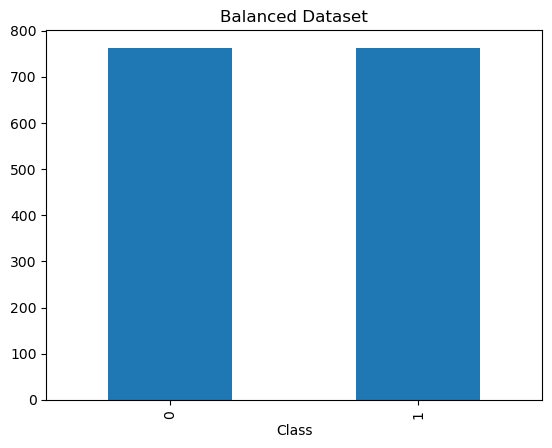

In [11]:
balanced_df['Class'].value_counts().plot(kind='bar')
plt.title("Balanced Dataset")
plt.show()

In [12]:
from sklearn.utils import resample

for i in range(5):
    sample = resample(
        balanced_df,
        replace=False,
        n_samples=int(0.7 * len(balanced_df)),
        random_state=100 + i
    )
    sample.to_csv(f"../data/sample_{i+1}.csv", index=False)

print("5 samples created from balanced data")

5 samples created from balanced data


In [13]:
for i in range(1, 6):
    s = pd.read_csv(f"../data/sample_{i}.csv")
    print(f"Sample {i}:", s.shape)

Sample 1: (1068, 31)
Sample 2: (1068, 31)
Sample 3: (1068, 31)
Sample 4: (1068, 31)
Sample 5: (1068, 31)


In [14]:
from sklearn.preprocessing import StandardScaler

X = balanced_df.drop("Class", axis=1)
y = balanced_df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sampling_methods import sampling1, sampling2, sampling3, sampling4, sampling5

samplers = {
    "Sampling1": sampling1,
    "Sampling2": sampling2,
    "Sampling3": sampling3,
    "Sampling4": sampling4,
    "Sampling5": sampling5
}

In [16]:
from sampling_methods import sampling1, sampling2, sampling3, sampling4, sampling5

samplers = {
    "Sampling1": sampling1,
    "Sampling2": sampling2,
    "Sampling3": sampling3,
    "Sampling4": sampling4,
    "Sampling5": sampling5
}

In [17]:
from models import get_models
models = get_models()

In [18]:
import numpy as np
results = {}

for s_name, sampler in samplers.items():
    X_s, y_s = sampler(X_scaled, y)
    results[s_name] = {}

    for m_name, model in models.items():
        model.fit(X_s, y_s)
        acc = model.score(X_s, y_s)
        results[s_name][m_name] = acc

In [19]:
results_df = pd.DataFrame(results)
results_df

,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
M1_Logistic,0.937090,0.937090,0.937090,0.956463,0.937090
M2_DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000
M3_RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000
M4_SVM,0.984928,0.984928,0.984928,0.993197,0.984928
M5_KNN,0.976409,0.976409,0.976409,0.995238,0.976409


In [20]:
results_df.to_csv("../results/accuracy_table.csv")

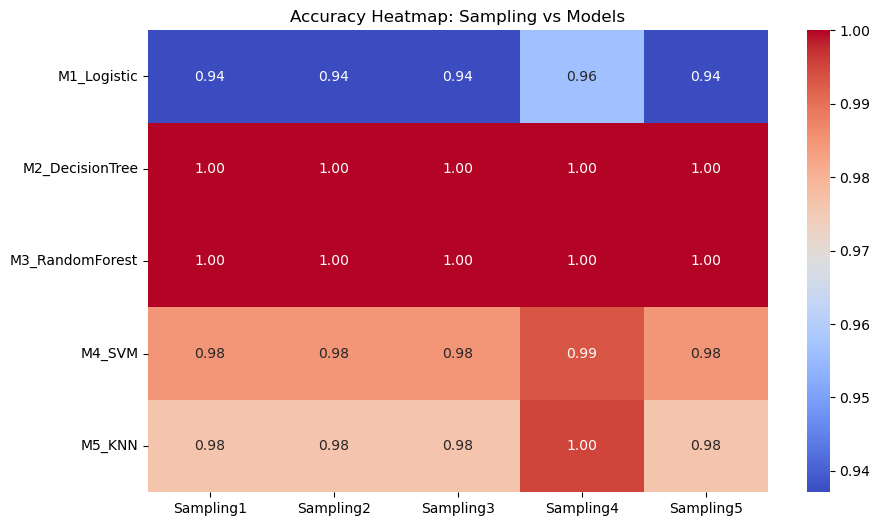

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(results_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Accuracy Heatmap: Sampling vs Models")
plt.savefig("../results/accuracy_heatmap.png")
plt.show()


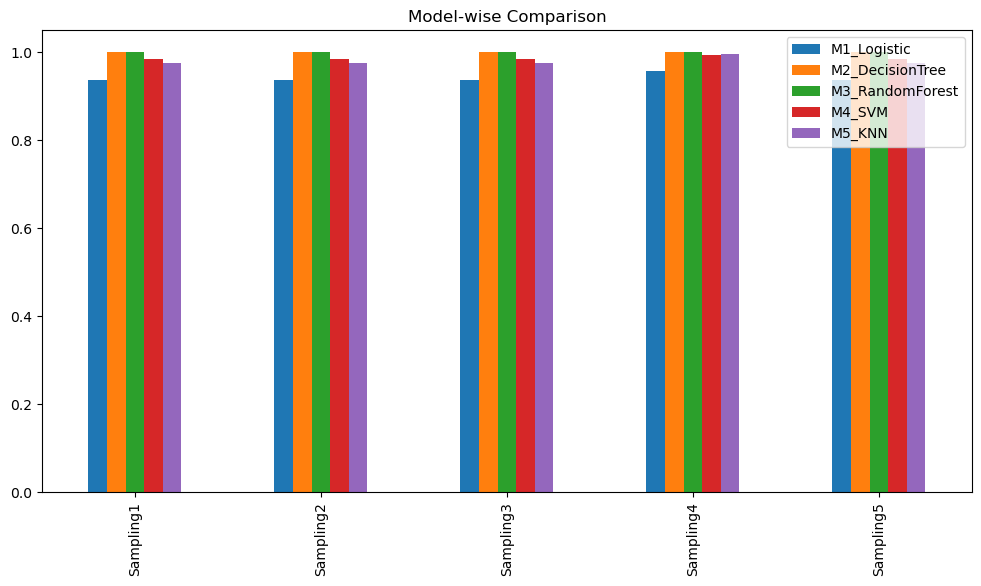

In [22]:
results_df.T.plot(kind="bar", figsize=(12,6))
plt.title("Model-wise Comparison")
plt.savefig("../results/model_comparison_barplot.png")
plt.show()

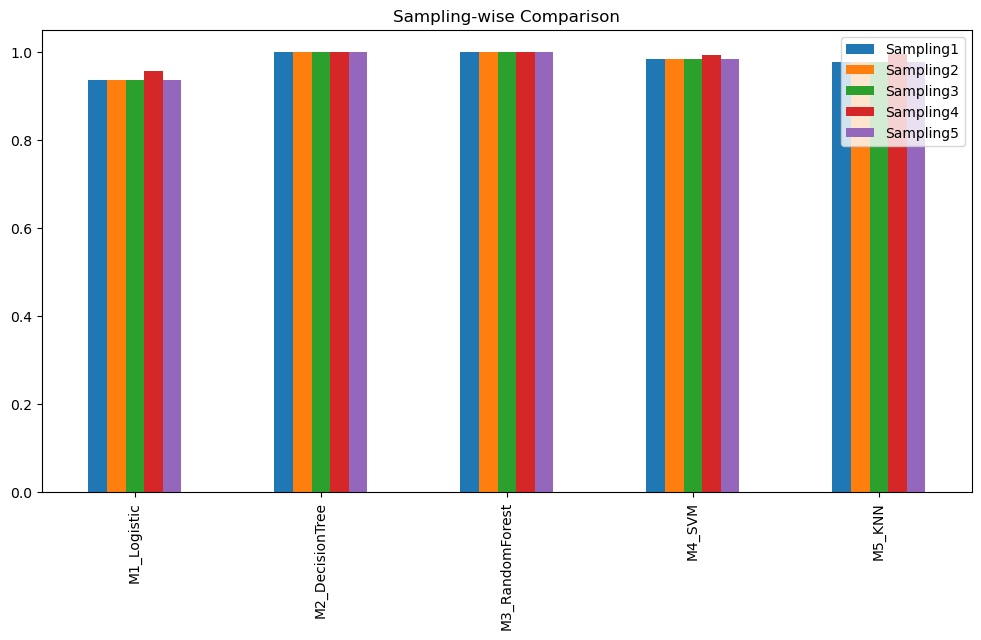

In [23]:
results_df.plot(kind="bar", figsize=(12,6))
plt.title("Sampling-wise Comparison")
plt.savefig("../results/sampling_comparison_barplot.png")
plt.show()